# Neural Networks - Gas Turbines Data

In [1]:
# importing necessary packages
import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam


### Loading Data

In [2]:
turbine_data= pd.read_csv('gas_turbines.csv')

In [3]:
# copy the data 
df= turbine_data.copy()

In [4]:
# Head of data
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### EDA

In [6]:
# Describe data
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
# Checking for null values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

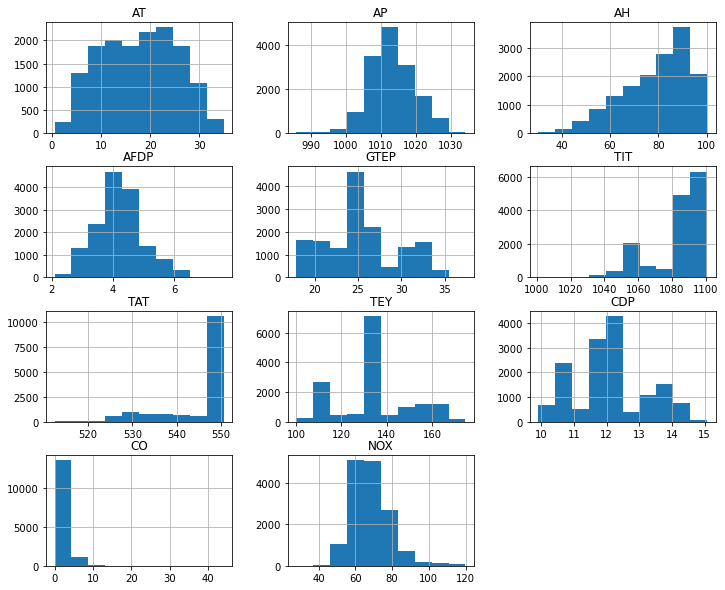

In [26]:
df.hist(figsize= (12,10))
plt.show()

<AxesSubplot:>

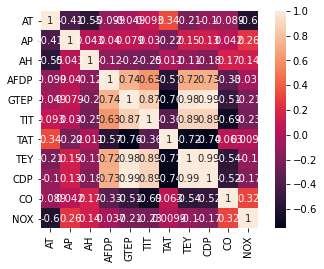

In [27]:
# Correlation between variables
c= df.corr()
sns.heatmap(c, vmax=1, square=True, annot= True)

In [10]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

#### separating independant and dependant variables

In [11]:
x= df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
print(x)
y= df['TEY']
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

In [12]:
# Standerdize the independant variables
x_standerdized= (x-x.mean())/x.std()

In [13]:
x_standerdized

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153144,-1.185388,1.401813,-0.865821,-1.498607,-2.063115,0.103449,-1.543109,1.145754,1.085714
15035,-1.303943,-1.138592,1.447705,-0.913440,-1.438712,-2.268829,-0.276629,-1.513196,1.293535,1.119905
15036,-1.386220,-1.076197,1.476921,-0.951457,-1.410920,-2.789165,-1.026616,-1.467873,2.695835,2.169990
15037,-1.420375,-0.998203,1.441542,-0.988815,-1.447576,-2.456392,-0.528319,-1.422551,1.924619,2.391085


#### Tunig hyperparameters- Batch size and epochs

In [14]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [15]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [16]:
# create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=50, epochs=10...................................
[CV 1/5; 1/18] END .................batch_size=50, epochs=10; total time=  11.9s
[CV 2/5; 1/18] START batch_size=50, epochs=10...................................
[CV 2/5; 1/18] END .................batch_size=50, epochs=10; total time=   1.7s
[CV 3/5; 1/18] START batch_size=50, epochs=10...................................
[CV 3/5; 1/18] END .................batch_size=50, epochs=10; total time=   1.8s
[CV 4/5; 1/18] START batch_size=50, epochs=10...................................
[CV 4/5; 1/18] END .................batch_size=50, epochs=10; total time=   1.8s
[CV 5/5; 1/18] START batch_size=50, epochs=10...................................
[CV 5/5; 1/18] END .................batch_size=50, epochs=10; total time=   1.8s
[CV 1/5; 2/18] START batch_size=50, epochs=50...................................
[CV 1/5; 2/18] END .................batch_size=5

[CV 1/5; 11/18] END ...............batch_size=400, epochs=50; total time=   1.4s
[CV 2/5; 11/18] START batch_size=400, epochs=50.................................
[CV 2/5; 11/18] END ...............batch_size=400, epochs=50; total time=   1.5s
[CV 3/5; 11/18] START batch_size=400, epochs=50.................................
[CV 3/5; 11/18] END ...............batch_size=400, epochs=50; total time=   1.4s
[CV 4/5; 11/18] START batch_size=400, epochs=50.................................
[CV 4/5; 11/18] END ...............batch_size=400, epochs=50; total time=   1.4s
[CV 5/5; 11/18] START batch_size=400, epochs=50.................................
[CV 5/5; 11/18] END ...............batch_size=400, epochs=50; total time=   1.4s
[CV 1/5; 12/18] START batch_size=400, epochs=100................................
[CV 1/5; 12/18] END ..............batch_size=400, epochs=100; total time=   2.5s
[CV 2/5; 12/18] START batch_size=400, epochs=100................................
[CV 2/5; 12/18] END ........

In [17]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6752451717853546, using {'batch_size': 50, 'epochs': 50}
-64.48910980224609,25.42003798701985 with: {'batch_size': 50, 'epochs': 10}
-0.6752451717853546,0.16947680277373753 with: {'batch_size': 50, 'epochs': 50}
-0.8295724332332611,0.2712976637851916 with: {'batch_size': 50, 'epochs': 100}
-205.0839416503906,71.9896883533007 with: {'batch_size': 100, 'epochs': 10}
-1.8147540092468262,0.9587693171472292 with: {'batch_size': 100, 'epochs': 50}
-0.712252962589264,0.2528826949251038 with: {'batch_size': 100, 'epochs': 100}
-661.6989135742188,109.14505758200596 with: {'batch_size': 200, 'epochs': 10}
-30.318712615966795,13.04919151379816 with: {'batch_size': 200, 'epochs': 50}
-1.4977444291114808,0.9067835089470163 with: {'batch_size': 200, 'epochs': 100}
-4773.341259765625,930.5506453281014 with: {'batch_size': 400, 'epochs': 10}
-126.93929748535156,53.24194102393763 with: {'batch_size': 400, 'epochs': 50}
-21.732759094238283,12.76162245128558 with: {'batch_size': 400, 'epochs': 10

#### Tuning hyperparameter: Learning rate and drop out rate

In [18]:
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
# Define grid search model
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]
# Make a dictionary of grid search parameters
param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/15] END ......dropout_rate=0, learning_rate=0.001; total time=   6.0s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END ......dropout_rate=0, learning_rate=0.001; total time=   7.2s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END ......dropout_rate=0, learning_rate=0.001; total time=   5.6s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END ......dropout_rate=0, learning_rate=0.001; total time=   6.6s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END ......dropout_rate=0, learning_rate=0.001; total time=   5.9s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/15] END .......dropout_rate=0, learni

[CV 1/5; 11/15] END ...dropout_rate=0.2, learning_rate=0.001; total time=   8.3s
[CV 2/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 2/5; 11/15] END ...dropout_rate=0.2, learning_rate=0.001; total time=   6.5s
[CV 3/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 3/5; 11/15] END ...dropout_rate=0.2, learning_rate=0.001; total time=   7.9s
[CV 4/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 4/5; 11/15] END ...dropout_rate=0.2, learning_rate=0.001; total time=   8.6s
[CV 5/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 5/5; 11/15] END ...dropout_rate=0.2, learning_rate=0.001; total time=   8.7s
[CV 1/5; 12/15] START dropout_rate=0.2, learning_rate=0.01......................
[CV 1/5; 12/15] END ....dropout_rate=0.2, learning_rate=0.01; total time=   6.6s
[CV 2/5; 12/15] START dropout_rate=0.2, learning_rate=0.01......................
[CV 2/5; 12/15] END ....drop

In [19]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.8292369604110718, using {'dropout_rate': 0, 'learning_rate': 0.001}
-0.8292369604110718,0.310089495741198 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-1.3194524645805359,0.5032006274444888 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-1.8891211152076721,1.6230582587317 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-64.83945070505142,125.60894783438705 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-187.16256847381592,106.63573545075715 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-15.996418380737305,6.092876521141271 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-5.48104305267334,4.0239275469988485 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-21.30838680267334,14.345885124839267 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-20.050645637512208,10.783750872850243 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-224.27338409423828,103.17227119906156 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-55.69983825683594,21.532647677414126 with: {'d

#### Tuning hyperparameters: Activation function and Kernal intitilizer

In [20]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
# Define grid search model
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']
# Make a dictionary of grid search parameters
param_grid= dict(activation_function= activation_function, init=init)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................
[CV 1/5; 1/6] END ..activation_function=linear, init=uniform; total time=   6.1s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END ..activation_function=linear, init=uniform; total time=   5.4s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END ..activation_function=linear, init=uniform; total time=   6.8s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END ..activation_function=linear, init=uniform; total time=   5.5s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END ..activation_function=linear, init=uniform; total time=   5.8s
[CV 1/5; 2/6] START activation_function=linear, init=normal.....................
[CV 1/5; 2/6] END ...activation_function=linear, 

In [21]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6521689414978027, using {'activation_function': 'linear', 'init': 'normal'}
-0.751317024230957,0.10108727551808962 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.6521689414978027,0.121631333824776 with: {'activation_function': 'linear', 'init': 'normal'}
-15175.934765625,820.9037435373533 with: {'activation_function': 'linear', 'init': 'zero'}
-0.7271067261695862,0.2062771130794956 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.7093437194824219,0.21665177148457643 with: {'activation_function': 'relu', 'init': 'normal'}
-15175.9451171875,820.9130286052407 with: {'activation_function': 'relu', 'init': 'zero'}


#### Tuning parameter: Number of neurons in activation layer

In [22]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
# Define grid search model
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
# Make a dictionary of grid search parameters
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 1/5; 1/27] END ..........neuron1=4, neuron2=4, neuron3=4; total time=   7.3s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END ..........neuron1=4, neuron2=4, neuron3=4; total time=   5.8s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END ..........neuron1=4, neuron2=4, neuron3=4; total time=   6.6s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END ..........neuron1=4, neuron2=4, neuron3=4; total time=   6.3s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END ..........neuron1=4, neuron2=4, neuron3=4; total time=   5.6s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END ..........neuron1=4, neuron2

[CV 1/5; 11/27] END .........neuron1=8, neuron2=4, neuron3=8; total time=   9.1s
[CV 2/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 2/5; 11/27] END .........neuron1=8, neuron2=4, neuron3=8; total time=   8.2s
[CV 3/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 3/5; 11/27] END .........neuron1=8, neuron2=4, neuron3=8; total time=   8.0s
[CV 4/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 4/5; 11/27] END .........neuron1=8, neuron2=4, neuron3=8; total time=   6.9s
[CV 5/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 5/5; 11/27] END .........neuron1=8, neuron2=4, neuron3=8; total time=   7.6s
[CV 1/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 1/5; 12/27] END ........neuron1=8, neuron2=4, neuron3=16; total time=   8.6s
[CV 2/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 2/5; 12/27] END ........

[CV 2/5; 21/27] END .......neuron1=16, neuron2=4, neuron3=16; total time=   7.1s
[CV 3/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 3/5; 21/27] END .......neuron1=16, neuron2=4, neuron3=16; total time=   7.4s
[CV 4/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 4/5; 21/27] END .......neuron1=16, neuron2=4, neuron3=16; total time=   7.0s
[CV 5/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 5/5; 21/27] END .......neuron1=16, neuron2=4, neuron3=16; total time=   7.7s
[CV 1/5; 22/27] START neuron1=16, neuron2=8, neuron3=4..........................
[CV 1/5; 22/27] END ........neuron1=16, neuron2=8, neuron3=4; total time=   6.4s
[CV 2/5; 22/27] START neuron1=16, neuron2=8, neuron3=4..........................
[CV 2/5; 22/27] END ........neuron1=16, neuron2=8, neuron3=4; total time=   8.0s
[CV 3/5; 22/27] START neuron1=16, neuron2=8, neuron3=4..........................
[CV 3/5; 22/27] END ........

In [23]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.5592378377914429, using {'neuron1': 16, 'neuron2': 8, 'neuron3': 16}
-0.6280557155609131,0.13822799399765132 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.6097639262676239,0.15057067607444272 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-0.5879219710826874,0.1633745800170848 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-0.6521893858909606,0.17174713086490237 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-0.6374637842178345,0.1464350082983058 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-0.7497297525405884,0.380302930158262 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-0.7353948473930358,0.13910918128376357 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-0.6573737382888794,0.1131998187733724 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-0.6619576573371887,0.06186383657234072 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-0.7748729765415192,0.2141803997925526 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-0.6137013673782349,0.10777464675

### Model using optimum hyperparameters

#### Tuning parameter: Number of neurons in activation layer

In [24]:
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=100)
# Fitting model
estimator= model.fit(x_standerdized,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, x_standerdized,y, cv= kfold)
print('mse:', results.mean())

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 1

In [25]:
print('MSE',results.mean())

MSE -0.6004873275756836
